<a href="https://colab.research.google.com/github/Giovanni-Zara/grapevine-berries-anomaly-detection-with-SAM-using-zero-shot-learning/blob/main/Copia_di_Progetto_tesi_Zara_PER_FARE_LE_PROVE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=8888 --NotebookApp.port_retries=0

#PROJECT STRUCTURE   DA RIVEDEREEEEE!!!!!

I've decided to structure my project in two different big sections.

* <b>In the first one</b> I'm going to test my dataset with [Lang SAM](https://github.com/luca-medeiros/lang-segment-anything), a sam-based model that allows to segment an image from a quite specific text prompt.
<br>I will test the zero-shot performance of the model and the reliability of the text prompt to resolve anomaly detection problems on my dataset.<br>
I will be processing all the images with this model, then calculating the accuracy and the metrics scores of it, trying to detect anomalies trought prompt

* However interesting and useful (specially for real-time anomaly detection issues) the first approach is, I would like to explore another model that may result in better performances.
<br><b>In the second section</b> I'm going to to develop an anomaly detection

*   Voce elenco
*   Voce elenco

algorithm using SAM as a base to preprocess images, following these steps:
<br>1)<b>Preprocessing</b>:
Prepare the dataset, ensuring I have images that contain normal and anomalous instances and removing the non important samples(Nan, non-images, outliers ...)
<br>2)<b>Segmentation with SAM</b>:
Use SAM to segment objects within the images. This will help in isolating objects of interest from the background.
<br>3)<b>Feature Extraction</b>:
Extract features from the segmented objects, applying feature extraction techniques to obtain detailed features.
<br>4)<b>Anomaly Detection</b>:
Use the extracted features to train an anomaly detection model. This could involve traditional machine learning methods (like isolation forests, one-class SVM) or deep learning-based approaches (like autoencoders, GANs).
<br>5)<b>Evaluation</b>:
Evaluate the performance of your anomaly detection algorithm using appropriate metrics (like precision, recall, F1-score) on a test set containing both normal and anomalous instances.

# Import Segment Anything(SAM) model

---





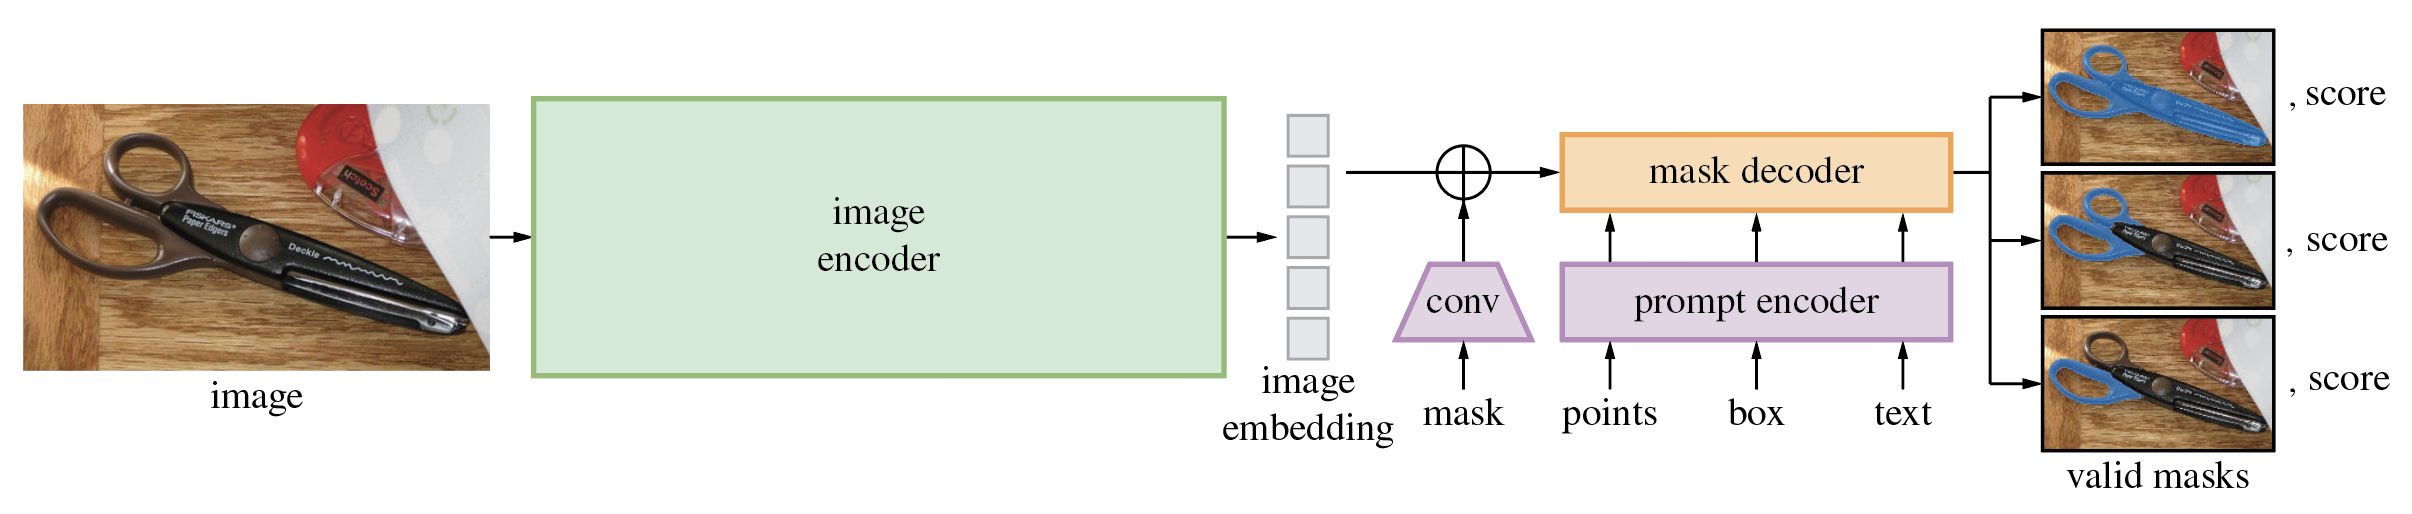

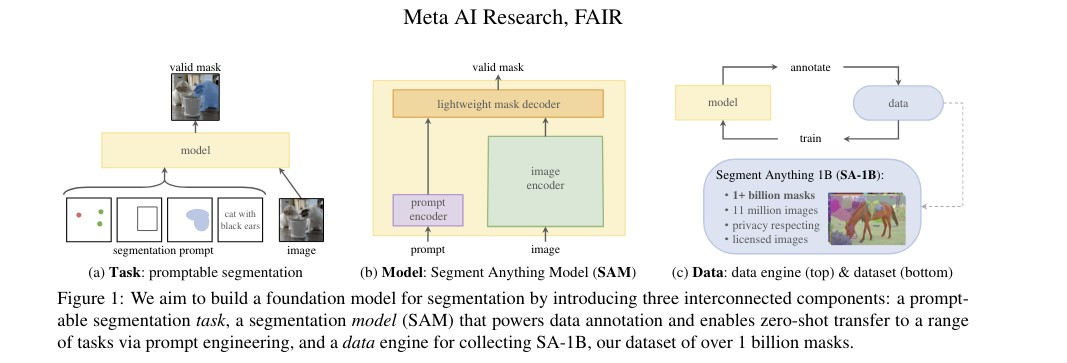

<b>Segment Anything technology</b>, which focuses on identifying and segmenting objects within images, can be very useful in anomaly detection algorithms. Here’s how:

* Accurate Object Localization:

 Segment Anything technology can precisely locate and outline objects in an image. In anomaly detection, having a detailed understanding of where objects are and what they look like when they are normal is crucial for identifying deviations or anomalies.

* Feature Extraction:

 The segmented objects can be used to extract specific features (such as shape, color, texture) that are important for defining what constitutes normality. Anomalies can then be detected by identifying objects whose features significantly deviate from the established normal features.

* Background-Foreground Separation:

 By segmenting objects, the algorithm can separate the relevant foreground objects from the background. Anomalies are often small changes in the foreground that might be missed if the background noise is not properly managed.

* Focused Analysis:

 Instead of analyzing the entire image, the algorithm can focus on the segmented regions of interest. This makes the detection process more efficient and potentially more accurate, as the algorithm does not waste resources on irrelevant parts of the image.


In [ ]:
!git clone https://github.com/facebookresearch/segment-anything.git


Cloning into 'segment-anything'...
remote: Enumerating objects: 295, done.
remote: Total 295 (delta 0), reused 0 (delta 0), pack-reused 295
Receiving objects: 100% (295/295), 18.30 MiB | 12.46 MiB/s, done.
Resolving deltas: 100% (155/155), done.


In [ ]:
%cd segment-anything/
!pip install -e .

/content/segment-anything
Obtaining file:///content/segment-anything
  Preparing metadata (setup.py) ... done
  Running setup.py develop for segment-anything


In [ ]:
!pip install opencv-python pycocotools matplotlib onnxruntime onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 120.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 115.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 101.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.1/301.1 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 112.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 102.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 111.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.3/309.3 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103

## importing pythorch vision audio with cuda

In [ ]:
using_colab = True
if using_colab:
    import torch
    import torchvision
    print("PyTorch version:", torch.__version__)
    print("Torchvision version:", torchvision.__version__)
    print("CUDA is available:", torch.cuda.is_available())

    #!mkdir images
    #!wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/dog.jpg

    #!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

PyTorch version: 2.3.0+cu121
Torchvision version: 0.18.0+cu121
CUDA is available: True


## Loading of the SAM mask autoencoder model
SAM provides three different model types as MAE(mask autoencoder) pre-trained Vision Transformer (ViT):
* vit-b (base dimension)
* vit-l (large dimension)
* vit-h (huge dimension)

The models are the same except for the neural network size, respectively little-large-huge.

I've chosen the vit-h SAM model as encoder, seen that (as reported in the paper) it has the best performances compared with the large and small version.


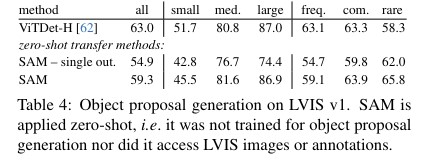

In [ ]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
file_path = '/content/segment-anything/sam_vit_h_4b8939.pth'

--2024-07-03 09:42:48--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.254.124, 108.157.254.15, 108.157.254.102, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.254.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   273MB/s    in 10s     

2024-07-03 09:42:58 (245 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



In [ ]:
from segment_anything import sam_model_registry
sam = sam_model_registry["vit_h"](checkpoint=file_path)

#Data Processing

##importing datas from drive

##Lang SAM setup

In [ ]:
!git clone https://github.com/luca-medeiros/lang-segment-anything
%cd lang-segment-anything
#!pip install torch torchvision
!pip install -e .

Cloning into 'lang-segment-anything'...
remote: Enumerating objects: 234, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 234 (delta 74), reused 58 (delta 58), pack-reused 134
Receiving objects: 100% (234/234), 13.23 MiB | 18.63 MiB/s, done.
Resolving deltas: 100% (98/98), done.
/content/lang-segment-anything
Obtaining file:///content/lang-segment-anything
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Cloning https://github.com/IDEA-Research/GroundingDINO.git to /tmp/pip-install-0hynm6m3/groundingdino_bf6d4e58fb1d4569ab5cb8b1d8896c63
  Running command git clone --filter=blob:none --quiet https://github.com/IDEA-Research/GroundingDINO.git /tmp/pip-install-0hynm6m3/groundingdino_bf6d4e58fb1d4569ab5cb8b1d8896c63
  Resolved https://github.com/IDEA-Research/Grou

In [ ]:
# Install Miniconda
!wget -c https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local

# Update conda
!conda install -q -y --prefix /usr/local python=3.8

# Initialize conda
!conda init

# Update the system path
import sys
sys.path.append('/usr/local/lib/python3.8/site-packages')

# Create the environment from environment.yml
!conda env create -f environment.yml

# Activate the new environment
import subprocess
subprocess.run(['source', 'activate', 'lsa'], shell=True)


--2024-07-04 10:58:49--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 146836934 (140M) [application/octet-stream]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>] 140.03M   316MB/s    in 0.4s    

2024-07-04 10:58:49 (316 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [146836934/146836934]

PREFIX=/usr/local
Unpacking payload ...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONP

CompletedProcess(args=['source', 'activate', 'lsa'], returncode=127)

###utils and funcions to display masks and metrics

In [ ]:
def download_image(url):
    response = requests.get(url)
    response.raise_for_status()
    return Image.open(BytesIO(response.content)).convert("RGB")

def save_mask(mask_np, filename):
    mask_image = Image.fromarray((mask_np * 255).astype(np.uint8))
    mask_image.save(filename)

def visualize_saved_masks(num_masks):
    for i in range(1, num_masks + 1):
        mask_path = f"image_mask_{i}.png"
        mask_img = Image.open(mask_path)

        plt.figure(figsize=(8, 8))
        if mask_img.mode == 'RGBA':
            # If masks have an alpha channel, remove it for display
            mask_img = mask_img.convert('RGB')

        plt.imshow(mask_img)  # Display as RGB (or whatever the mode is)
        plt.title(f"Mask {i}")
        plt.axis('off')
        plt.show()

def display_image_with_masks(image, masks):
    num_masks = len(masks)

    fig, axes = plt.subplots(1, num_masks + 1, figsize=(15, 5))
    axes[0].imshow(image)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    for i, mask_np in enumerate(masks):
        axes[i+1].imshow(mask_np, cmap='gray')
        axes[i+1].set_title(f"Mask {i+1}")
        axes[i+1].axis('off')

    plt.tight_layout()
    plt.show()

def display_image_with_boxes(image, boxes, logits):
    fig, ax = plt.subplots()
    ax.imshow(image)
    ax.set_title("Image with Bounding Boxes")
    ax.axis('off')

    for box, logit in zip(boxes, logits):
        x_min, y_min, x_max, y_max = box
        confidence_score = round(logit.item(), 2)  # Convert logit to a scalar before rounding
        box_width = x_max - x_min
        box_height = y_max - y_min

        # Draw bounding box
        rect = plt.Rectangle((x_min, y_min), box_width, box_height, fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

        # Add confidence score as text
        ax.text(x_min, y_min, f"Confidence: {confidence_score}", fontsize=8, color='red', verticalalignment='top')

    plt.show()

def print_bounding_boxes(boxes):
    print("Bounding Boxes:")
    for i, box in enumerate(boxes):
        print(f"Box {i+1}: {box}")

def print_detected_phrases(phrases):
    print("\nDetected Phrases:")
    for i, phrase in enumerate(phrases):
        print(f"Phrase {i+1}: {phrase}")

def print_logits(logits):
    print("\nConfidence:")
    for i, logit in enumerate(logits):
        print(f"Logit {i+1}: {logit}")


##example of how I'm processing the dataset
I've created an array of seven different text prompts that seem to be the most efficient ones.
In the following example I submit one image to the processing, to generate seven different boxed detections(one for each prompt).
<br>I will cross validate these seven different outputs to obtain a more efficient and reliable detection of the anomaly.

I will consider as reliable just the processings that share a certain amount of same or similar boxes, to contain the error and try to enhance the performance of the model on good samples (healthy grapes)

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


/usr/local/lib/python3.10/dist-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


Model loaded from /root/.cache/huggingface/hub/models--ShilongLiu--GroundingDINO/snapshots/a94c9b567a2a374598f05c584e96798a170c56fb/groundingdino_swinb_cogcoor.pth 
 => _IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight', 'bert.embeddings.position_ids'])


Downloading: "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth" to /root/.cache/torch/hub/checkpoints/sam_vit_h_4b8939.pth
100%|██████████| 2.39G/2.39G [00:13<00:00, 184MB/s]


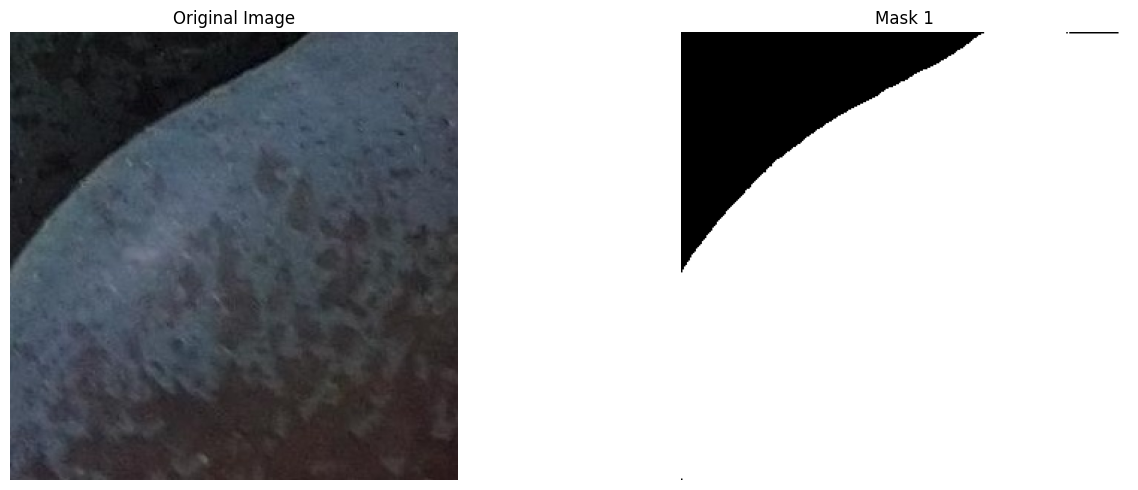

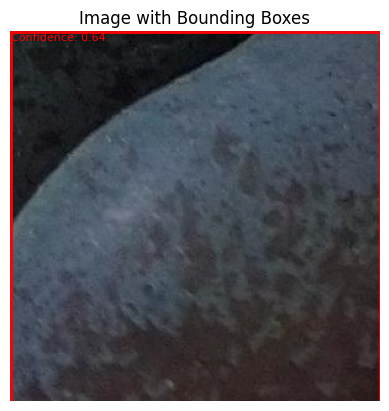

Bounding Boxes:
Box 1: tensor([2.1064e-02, 2.0993e-02, 3.0002e+02, 3.0002e+02])

Detected Phrases:
Phrase 1: rotten

Confidence:
Logit 1: 0.6383211016654968
------------------------------------------------------------



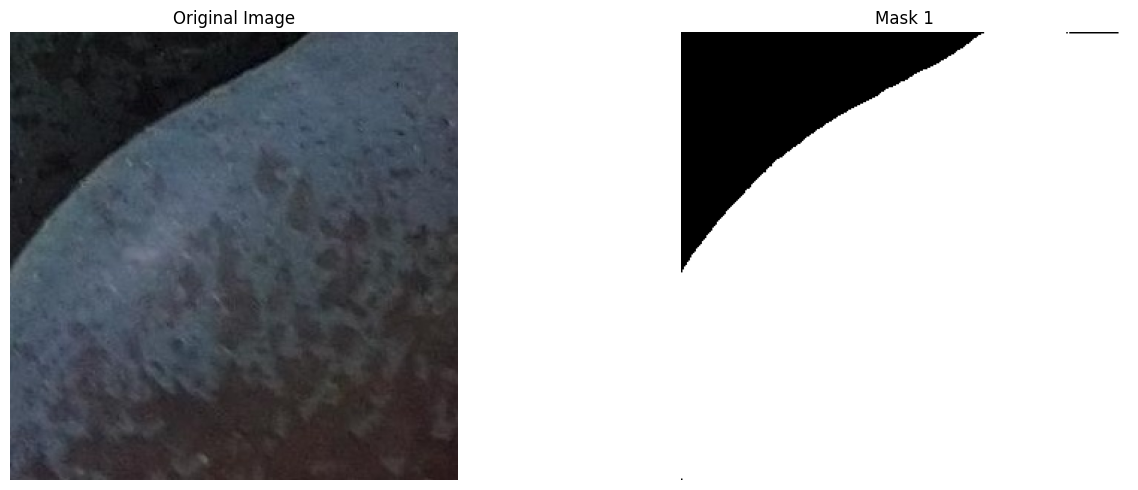

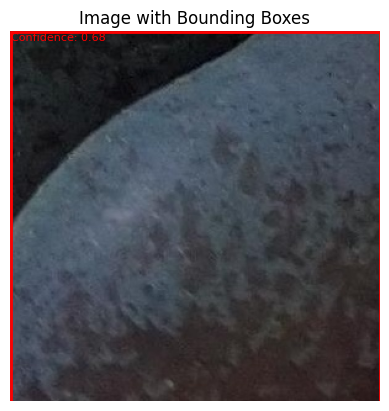

Bounding Boxes:
Box 1: tensor([-1.8239e-03,  4.3255e-02,  3.0000e+02,  3.0004e+02])

Detected Phrases:
Phrase 1: sick

Confidence:
Logit 1: 0.6811743974685669
------------------------------------------------------------



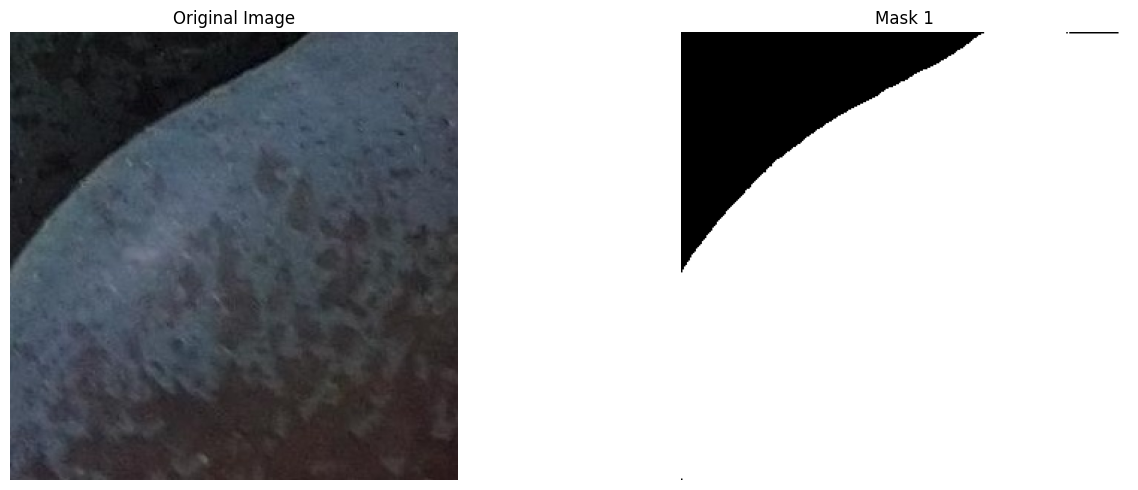

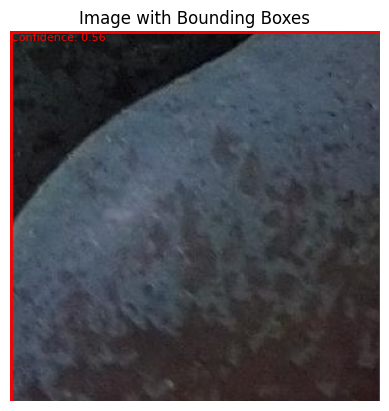

Bounding Boxes:
Box 1: tensor([6.6161e-03, 4.2021e-02, 3.0001e+02, 3.0004e+02])

Detected Phrases:
Phrase 1: moldy

Confidence:
Logit 1: 0.5596581101417542
------------------------------------------------------------



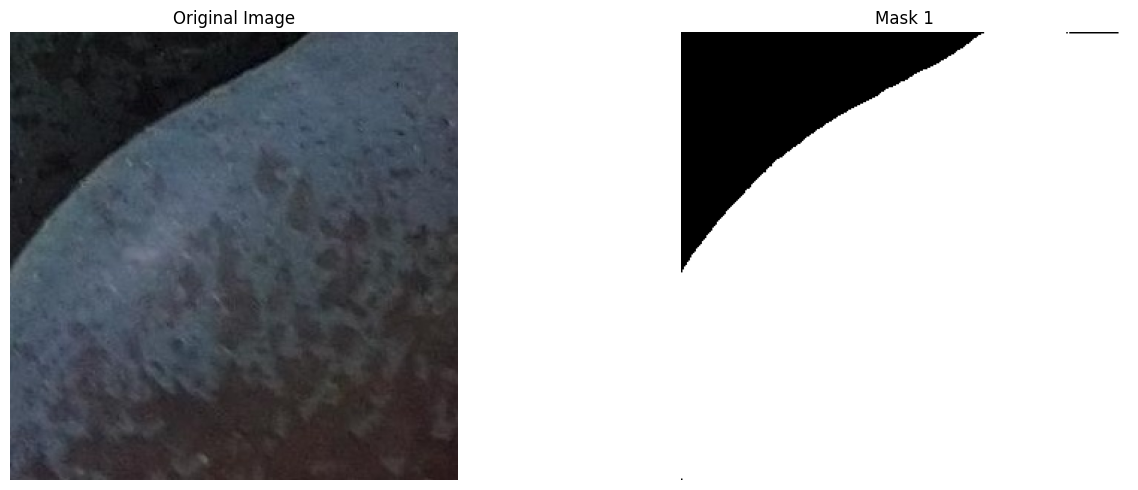

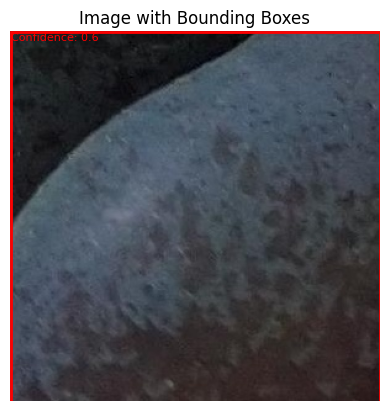

Bounding Boxes:
Box 1: tensor([1.2285e-02, 2.4837e-02, 3.0001e+02, 3.0002e+02])

Detected Phrases:
Phrase 1: rancid

Confidence:
Logit 1: 0.6020345091819763
------------------------------------------------------------



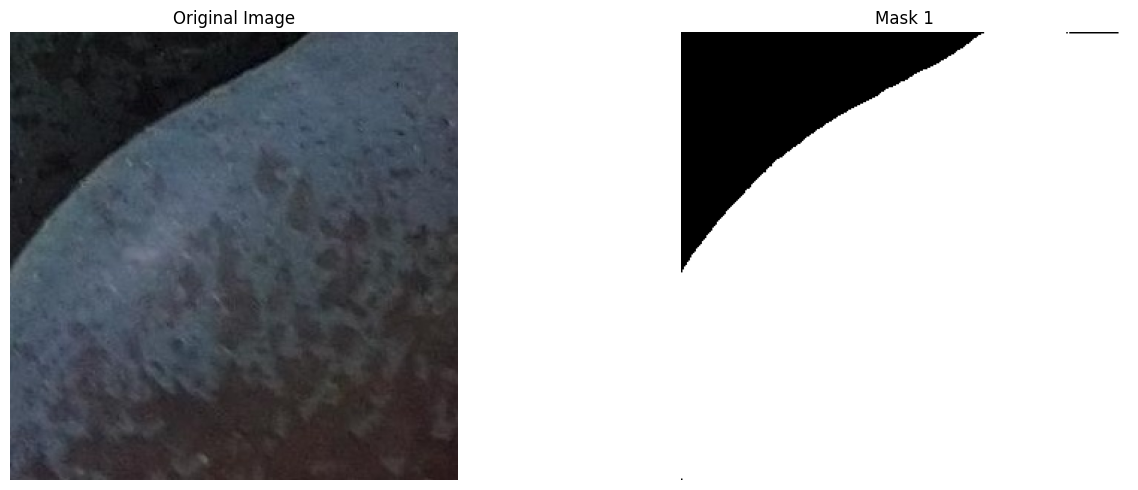

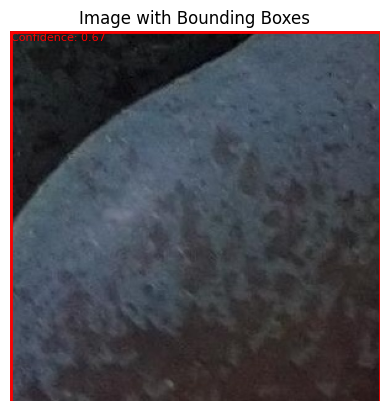

Bounding Boxes:
Box 1: tensor([-3.4511e-03,  5.1713e-02,  3.0000e+02,  3.0005e+02])

Detected Phrases:
Phrase 1: putrid

Confidence:
Logit 1: 0.6726462841033936
------------------------------------------------------------



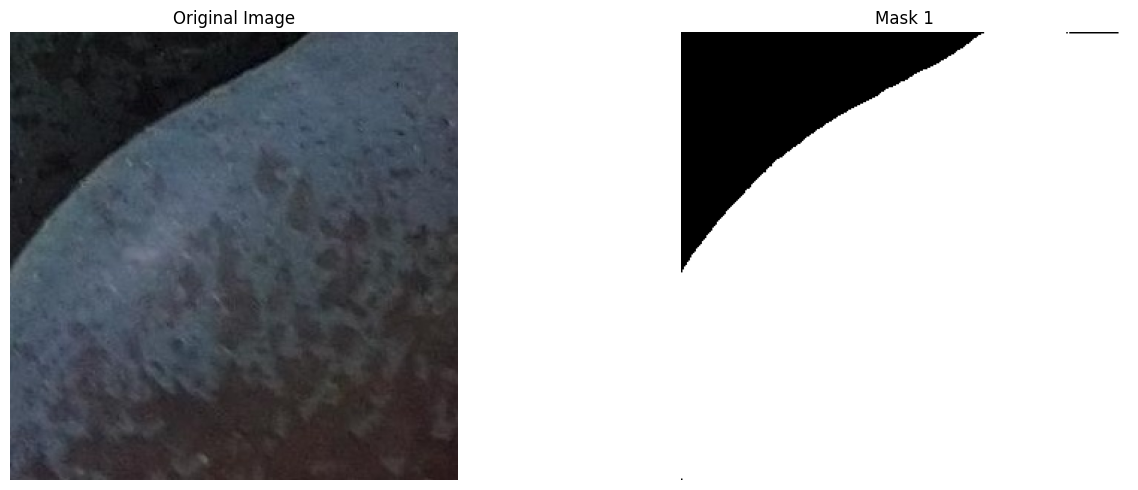

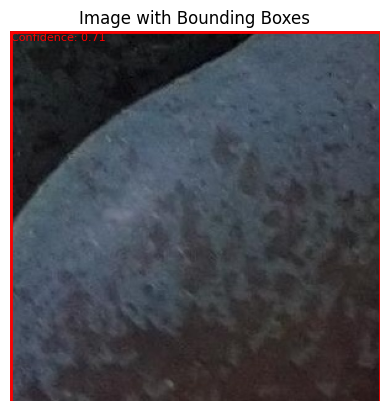

Bounding Boxes:
Box 1: tensor([3.9876e-03, 5.4181e-03, 3.0000e+02, 3.0000e+02])

Detected Phrases:
Phrase 1: bad

Confidence:
Logit 1: 0.7144438028335571
------------------------------------------------------------



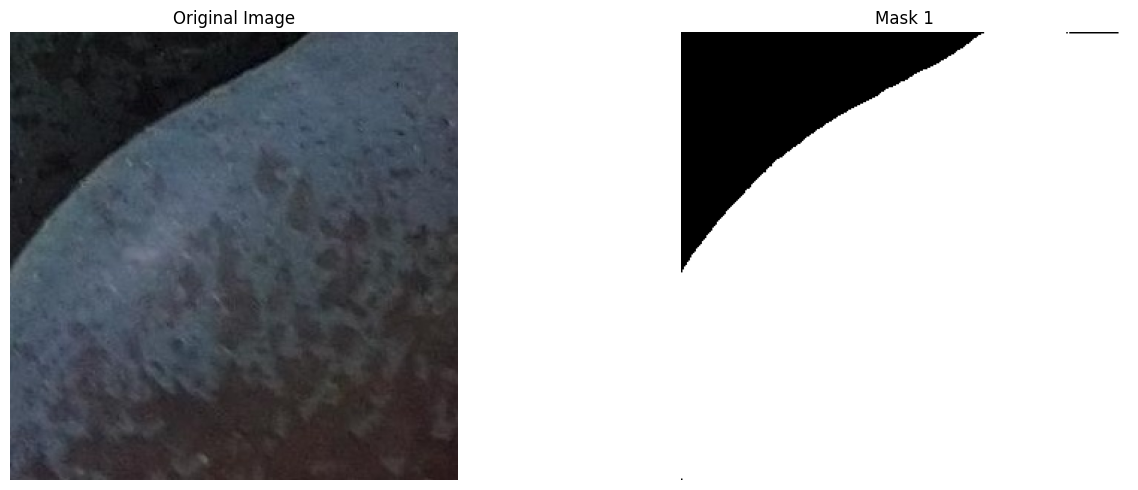

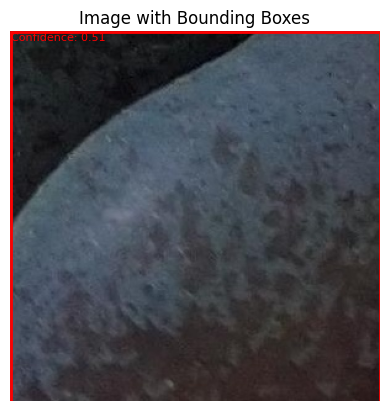

Bounding Boxes:
Box 1: tensor([-2.9504e-03, -1.0604e-02,  3.0000e+02,  2.9999e+02])

Detected Phrases:
Phrase 1: decomposed

Confidence:
Logit 1: 0.507116973400116
------------------------------------------------------------



In [ ]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
from lang_sam import LangSAM

model = LangSAM() #model initialisation

image = val_subset.__getitem__(150)[0]  #bad example image


prompts=["rotten", "sick","moldy","rancid","putrid","bad","decomposed"]

for i in range(len(prompts)):
  text_prompt = prompts[i]

      # Suppress warning messages
  warnings.filterwarnings("ignore")

  try:
      if image.startswith("http"):
          image_pil = download_image(image)
      else:
          image_pil = Image.open(image).convert("RGB")

      masks, boxes, phrases, logits = model.predict(image_pil, text_prompt)

      if len(masks) == 0:
          print(f"No objects of the '{text_prompt}' prompt detected in the image.")
      else:
          # Convert masks to numpy arrays
          masks_np = [mask.squeeze().cpu().numpy() for mask in masks]

          # Display the original image and masks side by side
          display_image_with_masks(image_pil, masks_np)

          # Display the image with bounding boxes and confidence scores
          display_image_with_boxes(image_pil, boxes, logits)

          # Save the masks
          for i, mask_np in enumerate(masks_np):
              mask_path = f"image_mask_{i+1}.png"
              save_mask(mask_np, mask_path)

          # Print the bounding boxes, phrases, and logits
          print_bounding_boxes(boxes)
          print_detected_phrases(phrases)
          print_logits(logits)
          print("------------------------------------------------------------\n")
  except (requests.exceptions.RequestException, IOError) as e:
      print(f"Error: {e}")



##prompt validation
I need to validate my prompt combination to try to obtain the best performance i can on my test datas.

As i'm working on a pretrained model on this forst approach to the project, i do not need to train the model.
Therefore I will split my dataset just in validation and test set.


In [ ]:
train_subset, val_subset, test_subset = split_dataset(dataset, train_ratio=0.01, val_ratio=0.59, test_ratio=0.4)

# Create DataLoader objects
train_loader, val_loader, test_loader = create_dataloaders(train_subset, val_subset, test_subset, batch_size=32)

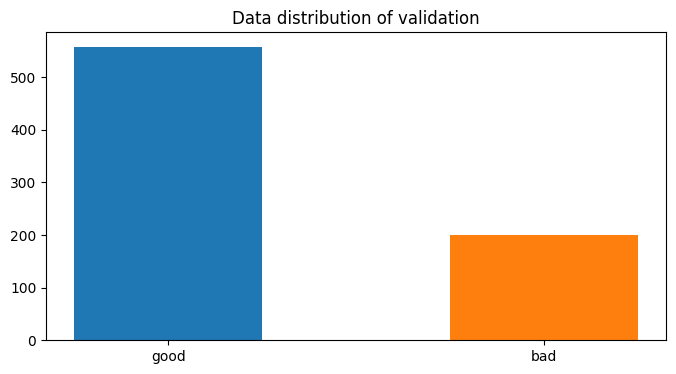

[557 199]


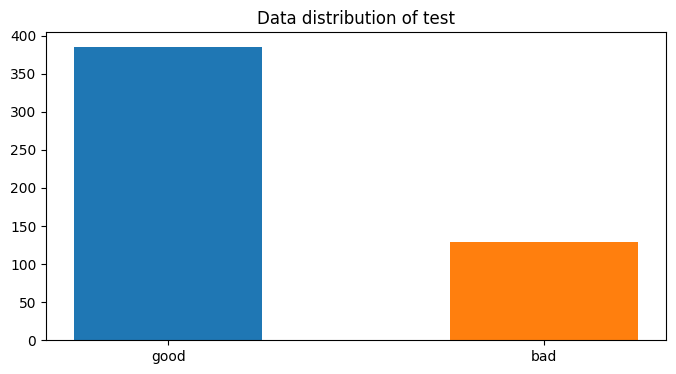

[385 129]


In [ ]:
#distribution(train_subset, "train")
distribution(val_subset, "validation")
distribution(test_subset, "test")

##combination of useful example prompts

In [ ]:
import random
from itertools import combinations

# Initial list of prompts with additional synonyms
prompts = [
    "rotten", "sick", "moldy", "black", "putrid", "decomposed",
    "diseased", "infected", "decayed", "blighted", "tainted", "spoiled", "wilted"
]

# Generate combinations of exactly 5 prompts
all_combinations = list(combinations(prompts, 5))

# Shuffle the combinations list to ensure randomness
random.shuffle(all_combinations)

# Ensure unique combinations to maximize diversity
unique_combinations = []
used_prompts = set()

for combo in all_combinations:
    combo_set = frozenset(combo)
    if combo_set not in used_prompts:
        unique_combinations.append(list(combo))
        used_prompts.add(combo_set)
    if len(unique_combinations) == 7:
        break

# Shuffle the prompts within each combination to add more randomness
for combo in unique_combinations:
    random.shuffle(combo)

# Print all combinations to verify
for idx, combo in enumerate(unique_combinations):
    print(f"Combination {idx + 1}: {combo}")

# Print the total number of combinations
print(f"Total number of combinations: {len(unique_combinations)}")


Combination 1: ['diseased', 'wilted', 'decomposed', 'moldy', 'decayed']
Combination 2: ['tainted', 'wilted', 'infected', 'diseased', 'putrid']
Combination 3: ['sick', 'decayed', 'tainted', 'wilted', 'infected']
Combination 4: ['decomposed', 'wilted', 'blighted', 'moldy', 'black']
Combination 5: ['spoiled', 'putrid', 'decomposed', 'wilted', 'black']
Combination 6: ['putrid', 'sick', 'tainted', 'spoiled', 'black']
Combination 7: ['blighted', 'wilted', 'sick', 'spoiled', 'rotten']
Total number of combinations: 7


##utils functions

###tensor comparison

In [ ]:
import torch
from itertools import combinations
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
from PIL import Image

def compare_tensors_within_epsilon(tensor1, tensor2, epsilon=50):
    if tensor1.size() != (4,) or tensor2.size() != (4,):
        raise ValueError("Tensors must have shape (4,) representing (x_min, y_min, x_max, y_max)")

    if (tensor1 < 10).any() or (tensor2 < 10).any():
        return False

    return torch.all(torch.abs(tensor1 - tensor2) <= epsilon)

def flag_image_as_bad(tensors_list, epsilon=50):
    if not tensors_list:
        return 0

    num_images = len(tensors_list)
    if num_images < 2:
        return 0

    count_good = 0
    min_similar = num_images // 2

    for idx1, idx2 in combinations(range(num_images), 2):
        tensors1 = tensors_list[idx1]
        tensors2 = tensors_list[idx2]

        for tensor1 in tensors1:
            for tensor2 in tensors2:
                if compare_tensors_within_epsilon(tensor1, tensor2, epsilon):
                    count_good += 1

    return 1 if count_good >= min_similar else 0

###evaluation model and metrics function

In [ ]:
import torch
from itertools import combinations
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
from PIL import Image


def evaluate_model(val_subset, prompts, model, epsilon=50):
    box_list = []
    for img_index in range(len(val_subset)):
        image, label = val_subset.__getitem__(img_index)
        box_list_temp = []
        for prompt in prompts:
            warnings.filterwarnings("ignore")
            try:
                if isinstance(image, str) and image.startswith("http"):
                    image_pil = download_image(image)
                else:
                    image_pil = Image.open(image).convert("RGB")
                masks, boxes, phrases, logits = model.predict(image_pil, prompt)
                if len(masks) > 0:
                    masks_np = [mask.squeeze().cpu().numpy() for mask in masks]
                    box_list_temp.append(boxes)
            except (requests.exceptions.RequestException, IOError) as e:
                print(f"Error: {e}")
        flag = flag_image_as_bad(box_list_temp, epsilon)
        box_list.append((image, label, flag, prompts))
        print(f"Image {img_index + 1}/{len(val_subset)} processed, Flag: {flag}, Label: {label}, Prompt: {prompts}.")
    return box_list

def calculate_metrics(results):
    true_labels = []
    predicted_labels = []

    for result in results:
        true_labels.append(result[1])
        predicted_labels.append(result[2])

    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')

    return precision, recall, f1




###final function to evaluate and select the best choice

In [ ]:
def evaluate_and_select_best(dataset, unique_combinations, model, epsilon=50):
    best_combination = None
    best_f1_score = -1
    all_metrics = []

    for idx, prompts_combination in enumerate(unique_combinations):
        results = evaluate_model(dataset, prompts_combination, model, epsilon)
        precision, recall, f1 = calculate_metrics(results)

        combination_metrics = {
            'prompts_combination': prompts_combination,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        }
        all_metrics.append(combination_metrics)

        if f1 > best_f1_score:
            best_f1_score = f1
            best_combination = prompts_combination

        print(f"Combination {idx + 1} / {len(unique_combinations)}")
        print(f"Prompts: {prompts_combination}\nPrecision: {precision:.4f}\tRecall: {recall:.4f}\tF1-score: {f1:.4f}")

    return best_combination, best_f1_score


In [ ]:
model = LangSAM()

final text_encoder_type: bert-base-uncased


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  resume_download=resume_download,


Model loaded from /root/.cache/huggingface/hub/models--ShilongLiu--GroundingDINO/snapshots/a94c9b567a2a374598f05c584e96798a170c56fb/groundingdino_swinb_cogcoor.pth 
 => _IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight', 'bert.embeddings.position_ids'])


In [ ]:
# Evaluate and select the best combination of prompts
#model = LangSAM() #model initialisation
best_prompts, best_score = evaluate_and_select_best(val_subset, unique_combinations, model)
print("Best Prompts Combination:", best_prompts)
print("Best Score:", best_score)

Image 1/756 processed, Flag: 1, Label: 1, Prompt: ['diseased', 'wilted', 'decomposed', 'moldy', 'decayed'].
Image 2/756 processed, Flag: 0, Label: 1, Prompt: ['diseased', 'wilted', 'decomposed', 'moldy', 'decayed'].
Image 3/756 processed, Flag: 1, Label: 1, Prompt: ['diseased', 'wilted', 'decomposed', 'moldy', 'decayed'].
Image 4/756 processed, Flag: 0, Label: 0, Prompt: ['diseased', 'wilted', 'decomposed', 'moldy', 'decayed'].
Image 5/756 processed, Flag: 0, Label: 0, Prompt: ['diseased', 'wilted', 'decomposed', 'moldy', 'decayed'].
Image 6/756 processed, Flag: 1, Label: 1, Prompt: ['diseased', 'wilted', 'decomposed', 'moldy', 'decayed'].
Image 7/756 processed, Flag: 0, Label: 0, Prompt: ['diseased', 'wilted', 'decomposed', 'moldy', 'decayed'].
Image 8/756 processed, Flag: 0, Label: 0, Prompt: ['diseased', 'wilted', 'decomposed', 'moldy', 'decayed'].
Image 9/756 processed, Flag: 1, Label: 0, Prompt: ['diseased', 'wilted', 'decomposed', 'moldy', 'decayed'].
Image 10/756 processed, Flag

##now i can test the model on the best prompt combo i've found:

In [ ]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
from lang_sam import LangSAM

model = LangSAM() #model initialisation
box_list = []

for i in range(len(dataset)):

  image = dataset.__getitem__(i)[0]
  label = dataset.__getitem__(i)[1]
  prompts=["rotten", "sick","bad","decomposed"]
  box_list_temp = []

  for i in range(len(prompts)):
    text_prompt = prompts[i]

        # Suppress warning messages
    warnings.filterwarnings("ignore")

    try:
        if image.startswith("http"):
            image_pil = download_image(image)
        else:
            image_pil = Image.open(image).convert("RGB")


        masks, boxes, phrases, logits = model.predict(image_pil, text_prompt)

        if len(masks) == 0:
            print(f"No objects of the '{text_prompt}' prompt detected in the image.")
        else:
            # Convert masks to numpy arrays
            masks_np = [mask.squeeze().cpu().numpy() for mask in masks]

            # Display the original image and masks side by side
            #display_image_with_masks(image_pil, masks_np)

            # Display the image with bounding boxes and confidence scores
            #display_image_with_boxes(image_pil, boxes, logits)

            # Save the masks
            for i, mask_np in enumerate(masks_np):
                mask_path = f"image_mask_{i+1}.png"
                save_mask(mask_np, mask_path)

            box_list_temp.append(boxes)
            # Print the bounding boxes, phrases, and logits
            #print_bounding_boxes(boxes)
            #print_detected_phrases(phrases)
            #print_logits(logits)
            print("-------------------------------------------------------------------------------------------------------\n")

    except (requests.exceptions.RequestException, IOError) as e:
        print(f"Error: {e}")
  flag_image_as_bad(box_list_temp, epsilon=50)


  print("image processed\n")
  box_list.append((image, label, flag_image_as_good))   #a list of triples, (the_image, the actual label, if was detected sick)
  print("immagine ",i,"/",len(dataset))

print(box_list)


final text_encoder_type: bert-base-uncased
Model loaded from /root/.cache/huggingface/hub/models--ShilongLiu--GroundingDINO/snapshots/a94c9b567a2a374598f05c584e96798a170c56fb/groundingdino_swinb_cogcoor.pth 
 => _IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight', 'bert.embeddings.position_ids'])
-------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------

No objects of the 'black' prompt detected in the image.
-------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------

In [ ]:
import os
import torch
from PIL import Image
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/drive',force_remount=True)
DATA_DIR = os.path.join("drive", "MyDrive", "canopies_dataset")

torch.manual_seed(42)

Mounted at /content/drive


#WORKFLOW


# Analyze data - Exploratory Data Analysis (EDA)
* Regression of Classification?
* What is the target variable?
* Is the data unbalanced?
* What are the features? Correlation, ranges, variances, values, NaN, errors…
* Plot to make findings clearer
# Define the relevant metrics to be used
# Train a first baseline algorithm as a reference, e.g.:
* For regression, train a model with all the features
* For classification test basic models as the one-class-classifier (always the same class) and the
basic logistic regression with all the features
* If there is already a State of the Art solution, use it as an additional baseline
# Prepare data (where needed):
* cleaning (e.g. remove NaN, outliers, …)
* normalization
* shuffling and train, test and validation set construction
## check the statistical properties of the splits
* Design experiments and define hyperparameters
* Repeat until performance on the test set is acceptable:
* Train model and cross validate hyper parameters until acceptable performance on training set
is achieved
* Test best hyper parameter model and check if there is overfitting or underfitting
* Final Evaluation: ablation studies and failure modes

#NEW MODEL TESTING


Dataset Preparation:

* Dataset Class: Well-define my dataset to load and preprocess the images.
* Dataset Splitting: Spliting my dataset into training, validation, and test sets. In particular I will initially split my dataset just in validation and training set, as I'm using a pretrained model for the first step.
Eventually, I will split again the segmented masks

Model Initialization:

* Load Grounded SAM:

* Initialize the Grounded SAM model for segmentation.

Segmentation:

* Segment Images: I will use Grounded SAM to segment images into different regions in two methods:
  * good samples -> from good samples i'm segmenting quite all i can extract, basically i want to reduce noise and remove background.
  * bad samples -> from bad samples i'm segmenting just the areas that the algorithm identificates as anomalies.
* Then i want to normalize this segmented masks to computationally simplify the processing of anomaly detection and classification.

Feature Extraction:

* Extract Features: I want to extract meaningful features from the segmented regions (e.g., color histograms, texture features, shape features).
In particular I want to extract the same features from the good and the bad masks.

Anomaly Detection:

* Train a Classifier: I will train a classifier (e.g., SVM, Random Forest, or a simple neural network) using the features I extracted from good grapes.
* Anomaly Detection: Use the classifier to detect anomalies in the test set.

Evaluation:

  * Metrics:

    * Evaluate the performance using precision, recall, F1-score, accuracy and other relevant metrics.

  * Visualization:

    * Results Visualization: Visualize the results by highlighting the detected anomalies

#Dataset preparation

In [1]:
import random
import numpy as np

#classe per la creazione di dataset
import os
import torch
from torch.utils.data import Dataset, Subset, DataLoader
import random
from sklearn.preprocessing import StandardScaler
import pandas as pd



class CanopiesDataset(Dataset):
    def __init__(self, root_dir, classe="every", scale="every"):
        self.root_dir = root_dir
        self.class_names = sorted(os.listdir(root_dir), reverse=True)
        self.image_paths = []

        for class_name in self.class_names:
            class_dir = os.path.join(root_dir, class_name)
            scale_dirs = os.listdir(class_dir)
            for scale_dir in scale_dirs:
                scale_path = os.path.join(class_dir, scale_dir)
                image_names = os.listdir(scale_path)
                for image_name in image_names:
                    if image_name.endswith(".jpg"):
                        if "hdr" not in image_name.lower():
                            if (classe == "every" or classe == class_name):
                                if (scale == "every" or scale == scale_dir):
                                    image_path = os.path.join(scale_path, image_name)
                                    self.image_paths.append((image_path, self.class_names.index(class_name)))

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path, label = self.image_paths[idx]
        return image_path, label

    def __open_image(self, idx):
        image = Image.open(self.image_paths[idx][0]).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image



def check_index(index, dataset):
  dataset_size = len(dataset)
  if(index > dataset_size):
    raise IndexError("Index out of bounds")
  return 1


def distribution(dataset, titolo):
    labels = np.array(list(zip(*dataset))[1])
    count_0 = np.sum(labels == 0)
    count_1 = len(labels) - count_0
    labels_count = np.array([count_0, count_1])
    class_names = ["good", "bad"]

    plt.figure(figsize=(8, 4))
    plt.title('Data distribution of '+ titolo)
    plt.bar(class_names, labels_count, width=.5, color = ['C0', 'C1'])
    plt.show()
    print(labels_count)

'''
from sklearn.preprocessing import StandardScaler
import pandas as pd

#normalizzazione standard
def norm_dataset(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

'''
'''
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the images to the same size
    transforms.ToTensor(),  # Convert the images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the images
])'''


'\ntransform = transforms.Compose([\n    transforms.Resize((224, 224)),  # Resize the images to the same size\n    transforms.ToTensor(),  # Convert the images to PyTorch tensors\n    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the images\n])'

In [2]:
import os
import torch
from PIL import Image
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/drive',force_remount=True)
DATA_DIR = os.path.join("drive", "MyDrive", "Canopies-data")

Mounted at /content/drive


In [3]:
# Create an instance of the CanopiesDataset
root_dir="/content/drive/MyDrive/first_dataset"
dataset_raw = CanopiesDataset(root_dir, classe="every", scale="every")


# Check the number of images in the dataset
print(f"Total number of images: {len(dataset_raw)}")

Total number of images: 1282


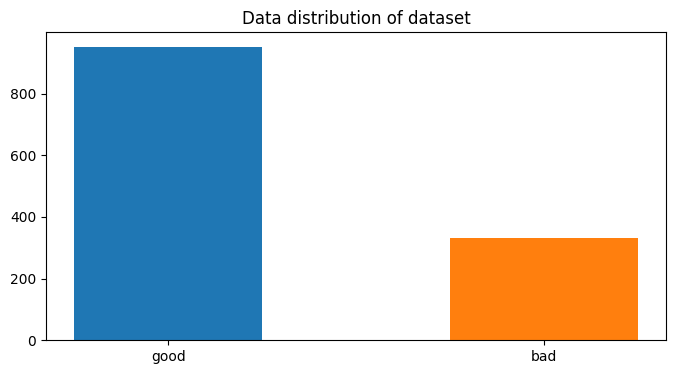

[951 331]


In [4]:
distribution(dataset_raw,"dataset")

##dataset balance considerations

As i can see from the above graph, this dataset is not perfectlyt balanced.
To evaluate the imbalance ratio of a dataset i analyze this formula:

$\text{Imbalance ratio} = \frac{\text{Number of samples in minority class}}{\text{Number of samples in majority class}} = \frac{350}{950} \approx 0.3684$

For problems such as mine, it's generally accepted to have an imbalance ratio about 1:3.
So for each element in the minority class(bad samples) i can have 3 elements in the majority class(good samples)

Therefore i can considerate *my* dataset acceptable with no downsampling operations to implement

##train-validation-test set splitting function

In [5]:
def split_dataset(dataset, train_ratio=0.7, val_ratio=0.2, test_ratio=0.1):
    """
    Splits the dataset into training, validation, and test sets.

    Args:
        dataset (torch.utils.data.Dataset): The dataset to split.
        train_ratio (float): The proportion of the dataset to include in the training set.
        val_ratio (float): The proportion of the dataset to include in the validation set.
        test_ratio (float): The proportion of the dataset to include in the test set.

    Returns:
        tuple: A tuple containing the training, validation, and test subsets.
    """
    epsilon = 1e-10  # Small epsilon to handle floating-point precision issues
    assert abs(train_ratio + val_ratio + test_ratio - 1.0) < epsilon, "Ratios must sum to 1"

    dataset_size = len(dataset)
    indices = list(range(dataset_size))
    random.shuffle(indices)

    train_end = int(train_ratio * dataset_size)
    val_end = train_end + int(val_ratio * dataset_size)

    train_indices = indices[:train_end]
    val_indices = indices[train_end:val_end]
    test_indices = indices[val_end:]

    train_subset = Subset(dataset, train_indices)
    val_subset = Subset(dataset, val_indices)
    test_subset = Subset(dataset, test_indices)

    return train_subset, val_subset, test_subset


##dataloaders function

In [6]:
def create_dataloaders(train_subset, val_subset, test_subset, batch_size=32):
    """
    Creates DataLoader objects for training, validation, and test sets.

    Args:
        train_subset (torch.utils.data.Dataset): The training subset.
        val_subset (torch.utils.data.Dataset): The validation subset.
        test_subset (torch.utils.data.Dataset): The test subset.
        batch_size (int): The number of samples per batch to load.

    Returns:
        tuple: A tuple containing DataLoader objects for the training, validation, and test sets.
    """
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader, test_loader


In [ ]:
train_subset, val_subset, test_subset = split_dataset(dataset_raw, train_ratio=0.6, val_ratio=0.2, test_ratio=0.2)

# Create DataLoader objects
train_loader, val_loader, test_loader = create_dataloaders(train_subset, val_subset, test_subset, batch_size=32)

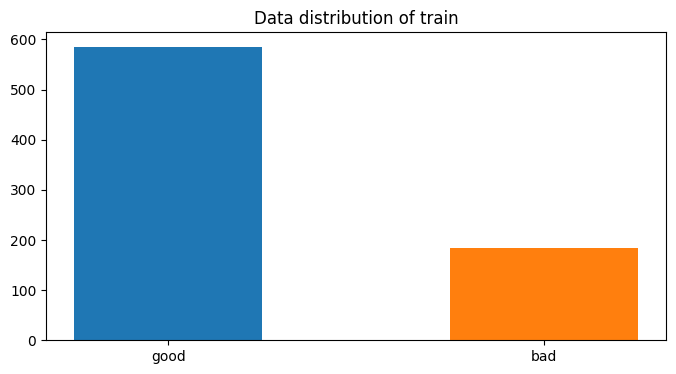

[585 184]


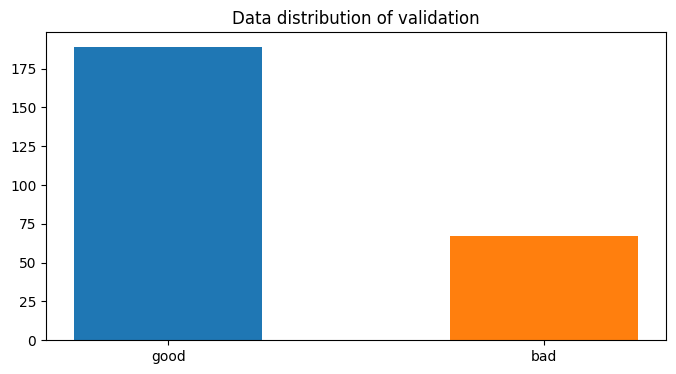

[189  67]


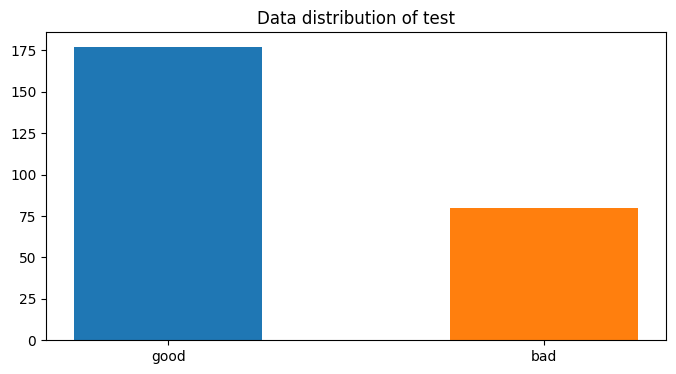

[177  80]


In [ ]:
distribution(train_subset, "train")
distribution(val_subset, "validation")
distribution(test_subset, "test")

#Setting up model


In [7]:
!pip install --upgrade -q git+https://github.com/huggingface/transformers

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [8]:
import random
from dataclasses import dataclass
from typing import Any, List, Dict, Optional, Union, Tuple

import cv2
import torch
import requests
import numpy as np
from PIL import Image
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from transformers import AutoModelForMaskGeneration, AutoProcessor, pipeline

##Dedicated dataclass for ground dino results

In [9]:
@dataclass
class BoundingBox:
    xmin: int
    ymin: int
    xmax: int
    ymax: int

    @property
    def xyxy(self) -> List[float]:
        return [self.xmin, self.ymin, self.xmax, self.ymax]

@dataclass
class DetectionResult:
    score: float
    label: str
    box: BoundingBox
    mask: Optional[np.array] = None

    @classmethod
    def from_dict(cls, detection_dict: Dict) -> 'DetectionResult':
        return cls(score=detection_dict['score'],
                   label=detection_dict['label'],
                   box=BoundingBox(xmin=detection_dict['box']['xmin'],
                                   ymin=detection_dict['box']['ymin'],
                                   xmax=detection_dict['box']['xmax'],
                                   ymax=detection_dict['box']['ymax']))


##Plot utils

In [10]:
def annotate(image: Union[Image.Image, np.ndarray], detection_results: List[DetectionResult]) -> np.ndarray:  #Drawing bounding boxes around detected objects. Optionally overlaying segmentation masks (if available) over the detected objects.
    # Convert PIL Image to OpenCV format
    image_cv2 = np.array(image) if isinstance(image, Image.Image) else image
    image_cv2 = cv2.cvtColor(image_cv2, cv2.COLOR_RGB2BGR)

    # Iterate over detections and add bounding boxes and masks
    for detection in detection_results:
        label = detection.label
        score = detection.score
        box = detection.box
        mask = detection.mask

        # Sample a random color for each detection
        color = np.random.randint(0, 256, size=3)

        # Draw bounding box
        cv2.rectangle(image_cv2, (box.xmin, box.ymin), (box.xmax, box.ymax), color.tolist(), 2)
        cv2.putText(image_cv2, f'{label}: {score:.2f}', (box.xmin, box.ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color.tolist(), 2)

        # If mask is available, apply it
        if mask is not None:
            # Convert mask to uint8
            mask_uint8 = (mask * 255).astype(np.uint8)
            contours, _ = cv2.findContours(mask_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            cv2.drawContours(image_cv2, contours, -1, color.tolist(), 2)

    return cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)

def plot_detections(
    image: Union[Image.Image, np.ndarray],
    detections: List[DetectionResult],
    save_name: Optional[str] = None
) -> None:
    annotated_image = annotate(image, detections)
    plt.imshow(annotated_image)
    plt.axis('off')
    if save_name:
        plt.savefig(save_name, bbox_inches='tight')
    plt.show()


##Code for plots

In [11]:
def random_named_css_colors(num_colors: int) -> List[str]:
    """
    Returns a list of randomly selected named CSS colors.

    Args:
    - num_colors (int): Number of random colors to generate.

    Returns:
    - list: List of randomly selected named CSS colors.
    """
    # List of named CSS colors
    named_css_colors = [
        'aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond',
        'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue',
        'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey',
        'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen',
        'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue',
        'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite',
        'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory',
        'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow',
        'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lightseagreen', 'lightskyblue', 'lightslategray',
        'lightslategrey', 'lightsteelblue', 'lightyellow', 'lime', 'limegreen', 'linen', 'magenta', 'maroon', 'mediumaquamarine',
        'mediumblue', 'mediumorchid', 'mediumpurple', 'mediumseagreen', 'mediumslateblue', 'mediumspringgreen', 'mediumturquoise',
        'mediumvioletred', 'midnightblue', 'mintcream', 'mistyrose', 'moccasin', 'navajowhite', 'navy', 'oldlace', 'olive',
        'olivedrab', 'orange', 'orangered', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise', 'palevioletred', 'papayawhip',
        'peachpuff', 'peru', 'pink', 'plum', 'powderblue', 'purple', 'rebeccapurple', 'red', 'rosybrown', 'royalblue', 'saddlebrown',
        'salmon', 'sandybrown', 'seagreen', 'seashell', 'sienna', 'silver', 'skyblue', 'slateblue', 'slategray', 'slategrey',
        'snow', 'springgreen', 'steelblue', 'tan', 'teal', 'thistle', 'tomato', 'turquoise', 'violet', 'wheat', 'white',
        'whitesmoke', 'yellow', 'yellowgreen'
    ]

    # Sample random named CSS colors
    return random.sample(named_css_colors, min(num_colors, len(named_css_colors)))

def plot_detections_plotly(
    image: np.ndarray,
    detections: List[DetectionResult],
    class_colors: Optional[Dict[str, str]] = None
) -> None:
    # If class_colors is not provided, generate random colors for each class
    if class_colors is None:
        num_detections = len(detections)
        colors = random_named_css_colors(num_detections)
        class_colors = {}
        for i in range(num_detections):
            class_colors[i] = colors[i]


    fig = px.imshow(image)

    # Add bounding boxes
    shapes = []
    annotations = []
    for idx, detection in enumerate(detections):
        label = detection.label
        box = detection.box
        score = detection.score
        mask = detection.mask

        polygon = mask_to_polygon(mask)

        fig.add_trace(go.Scatter(
            x=[point[0] for point in polygon] + [polygon[0][0]],
            y=[point[1] for point in polygon] + [polygon[0][1]],
            mode='lines',
            line=dict(color=class_colors[idx], width=2),
            fill='toself',
            name=f"{label}: {score:.2f}"
        ))

        xmin, ymin, xmax, ymax = box.xyxy
        shape = [
            dict(
                type="rect",
                xref="x", yref="y",
                x0=xmin, y0=ymin,
                x1=xmax, y1=ymax,
                line=dict(color=class_colors[idx])
            )
        ]
        annotation = [
            dict(
                x=(xmin+xmax) // 2, y=(ymin+ymax) // 2,
                xref="x", yref="y",
                text=f"{label}: {score:.2f}",
            )
        ]

        shapes.append(shape)
        annotations.append(annotation)

    # Update layout
    button_shapes = [dict(label="None",method="relayout",args=["shapes", []])]
    button_shapes = button_shapes + [
        dict(label=f"Detection {idx+1}",method="relayout",args=["shapes", shape]) for idx, shape in enumerate(shapes)
    ]
    button_shapes = button_shapes + [dict(label="All", method="relayout", args=["shapes", sum(shapes, [])])]

    fig.update_layout(
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        # margin=dict(l=0, r=0, t=0, b=0),
        showlegend=True,
        updatemenus=[
            dict(
                type="buttons",
                direction="up",
                buttons=button_shapes
            )
        ],
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        )
    )

    # Show plot
    fig.show()



##other utils

In [12]:
def mask_to_polygon(mask: np.ndarray) -> List[List[int]]:
    # Find contours in the binary mask
    contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the contour with the largest area
    largest_contour = max(contours, key=cv2.contourArea)

    # Extract the vertices of the contour
    polygon = largest_contour.reshape(-1, 2).tolist()

    return polygon

def polygon_to_mask(polygon: List[Tuple[int, int]], image_shape: Tuple[int, int]) -> np.ndarray:
    """
    Convert a polygon to a segmentation mask.

    Args:
    - polygon (list): List of (x, y) coordinates representing the vertices of the polygon.
    - image_shape (tuple): Shape of the image (height, width) for the mask.

    Returns:
    - np.ndarray: Segmentation mask with the polygon filled.
    """
    # Create an empty mask
    mask = np.zeros(image_shape, dtype=np.uint8)

    # Convert polygon to an array of points
    pts = np.array(polygon, dtype=np.int32)

    # Fill the polygon with white color (255)
    cv2.fillPoly(mask, [pts], color=(255,))

    return mask

def load_image(image_str: str) -> Image.Image:
    if image_str.startswith("http"):
        image = Image.open(requests.get(image_str, stream=True).raw).convert("RGB")
    else:
        image = Image.open(image_str).convert("RGB")

    return image

def get_boxes(results: DetectionResult) -> List[List[List[float]]]:
    boxes = []
    for result in results:
        xyxy = result.box.xyxy
        boxes.append(xyxy)

    return [boxes]

def refine_masks(masks: torch.BoolTensor, polygon_refinement: bool = False) -> List[np.ndarray]:
    masks = masks.cpu().float()
    masks = masks.permute(0, 2, 3, 1)
    masks = masks.mean(axis=-1)
    masks = (masks > 0).int()
    masks = masks.numpy().astype(np.uint8)
    masks = list(masks)

    if polygon_refinement:
        for idx, mask in enumerate(masks):
            shape = mask.shape
            polygon = mask_to_polygon(mask)
            mask = polygon_to_mask(polygon, shape)
            masks[idx] = mask

    return masks

##Grounded Segment Anything (SAM)
Now it's time to define the Grounded SAM approach!

The approach is very simple:

use Grounding DINO to detect a given set of texts in the image. The output is a set of bounding boxes.
prompt Segment Anything (SAM) with the bounding boxes, for which the model will output segmentation masks.

In [13]:
def detect(
    image: Image.Image,
    labels: List[str],
    threshold: float = 0.3,
    detector_id: Optional[str] = None
) -> List[Dict[str, Any]]:
    """
    Use Grounding DINO to detect a set of labels in an image in a zero-shot fashion.
    """
    device = "cuda" if torch.cuda.is_available() else "cpu"
    detector_id = detector_id if detector_id is not None else "IDEA-Research/grounding-dino-tiny"
    object_detector = pipeline(model=detector_id, task="zero-shot-object-detection", device=device)

    labels = [label if label.endswith(".") else label+"." for label in labels]

    results = object_detector(image,  candidate_labels=labels, threshold=threshold)
    results = [DetectionResult.from_dict(result) for result in results]

    return results

def segment(
    image: Image.Image,
    detection_results: List[Dict[str, Any]],
    polygon_refinement: bool = False,
    segmenter_id: Optional[str] = None
) -> List[DetectionResult]:
    """
    Use Segment Anything (SAM) to generate masks given an image + a set of bounding boxes.
    """
    device = "cuda" if torch.cuda.is_available() else "cpu"
    segmenter_id = segmenter_id if segmenter_id is not None else "facebook/sam-vit-base"

    segmentator = AutoModelForMaskGeneration.from_pretrained(segmenter_id).to(device)
    processor = AutoProcessor.from_pretrained(segmenter_id)

    boxes = get_boxes(detection_results)

    #if

    inputs = processor(images=image, input_boxes=boxes, return_tensors="pt").to(device)

    outputs = segmentator(**inputs)
    masks = processor.post_process_masks(
        masks=outputs.pred_masks,
        original_sizes=inputs.original_sizes,
        reshaped_input_sizes=inputs.reshaped_input_sizes
    )[0]

    masks = refine_masks(masks, polygon_refinement)

    for detection_result, mask in zip(detection_results, masks):  #zip iterates tuples
        detection_result.mask = mask

    return detection_results

def grounded_segmentation(
    image: Union[Image.Image, str],
    labels: List[str],
    threshold: float = 0.3,
    polygon_refinement: bool = False,
    detector_id: Optional[str] = None,
    segmenter_id: Optional[str] = None
) -> Tuple[np.ndarray, List[DetectionResult]]:
    if isinstance(image, str):
        image = load_image(image)

    detections = detect(image, labels, threshold, detector_id)
    detections = segment(image, detections, polygon_refinement, segmenter_id)

    return np.array(image), detections


#Segmentation
Now I need to segment my masks from the good and the bad dataset with two different approaches.

##Bad segmentation
For the bad dataset i'm using the following logic:
I need to extract from this dataset what the algorithm detects to be a BAD patch, so a sick mask.
To do so I want to validate the model with different combination of accuracy thresholds and different combinations of text prompts.
I will then choose the combo that returns the bigger number of masks with the better accuracy.
So a mean of the masks weighted on their accuracy.

In [14]:
import random
from itertools import combinations

# Initial list of prompts with additional synonyms
prompts = [
    "rotten.", "sick.", "moldy.", "black.", "putrid.", "decomposed.",
    "diseased.", "infected.", "decayed.", "blighted.", "tainted.", "spoiled.", "wilted."
]

# Generate combinations of exactly 3 prompts
all_combinations = list(combinations(prompts, 6))

# Shuffle the combinations list to ensure randomness
random.shuffle(all_combinations)

# Ensure unique combinations to maximize diversity
unique_combinations = []
used_prompts = set()

for combo in all_combinations:
    combo_set = frozenset(combo)
    if combo_set not in used_prompts:
        unique_combinations.append(list(combo))
        used_prompts.add(combo_set)
    if len(unique_combinations) == 5:
        break

# Shuffle the prompts within each combination to add more randomness
for combo in unique_combinations:
    random.shuffle(combo)

# Print all combinations to verify
for idx, combo in enumerate(unique_combinations):
    print(f"Combination {idx + 1}: {combo}")

# Print the total number of combinations
print(f"Total number of combinations: {len(unique_combinations)}")


Combination 1: ['putrid.', 'infected.', 'rotten.', 'blighted.', 'black.', 'tainted.']
Combination 2: ['rotten.', 'black.', 'diseased.', 'sick.', 'putrid.', 'tainted.']
Combination 3: ['blighted.', 'sick.', 'tainted.', 'putrid.', 'black.', 'rotten.']
Combination 4: ['putrid.', 'wilted.', 'blighted.', 'infected.', 'black.', 'moldy.']
Combination 5: ['rotten.', 'tainted.', 'decomposed.', 'decayed.', 'sick.', 'black.']
Total number of combinations: 5


In [15]:
dataset_BAD = CanopiesDataset(root_dir, classe="bad", scale="every")
dataset_GOOD = CanopiesDataset(root_dir, classe="good", scale="every")

In [20]:
image_url = "/content/drive/MyDrive/first_dataset/bad/scale_2/IMG_20210924_171510186_HDR_00.jpg"
labels = ["sick .", "anomalous.", "diseased.","moldy.","black."]
threshold = 0.3

detector_id = "IDEA-Research/grounding-dino-tiny"
segmenter_id = "facebook/sam-vit-base"

###an example of what i'm doing

[DetectionResult(score=0.5170136094093323, label='anomalous.', box=BoundingBox(xmin=271, ymin=194, xmax=491, ymax=570), mask=array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)), DetectionResult(score=0.4238082468509674, label='moldy.', box=BoundingBox(xmin=60, ymin=49, xmax=307, ymax=575), mask=array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)), DetectionResult(score=0.3300115168094635, label='sick .', box=BoundingBox(xmin=0, ymin=0, xmax=600, ymax=600), mask=array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0, 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
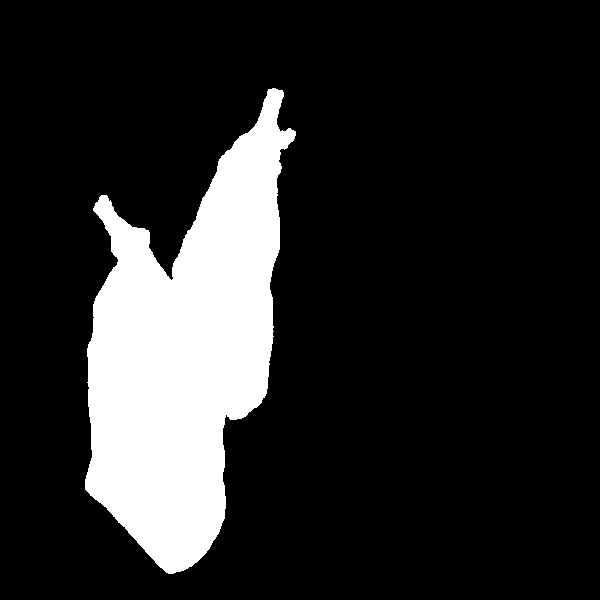

In [29]:
image_array, detections = grounded_segmentation(
    image=image_url,
    labels=labels,
    threshold=threshold,
    polygon_refinement=True,
    detector_id=detector_id,
    segmenter_id=segmenter_id
)
print(detections)
detections[1].mask

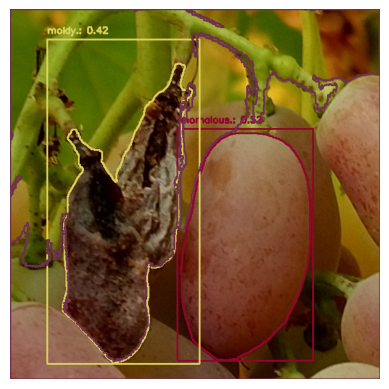

In [22]:
plot_detections(image_array, detections, "uva")

In [23]:
plot_detections_plotly(image_array, detections)

###validations of prompts
In the following cells i validate the best prompts on the first 100 bad images(for computational problems), so the prompts that can extract more patches from my bad dataset.
I iterate on a combination of shuffled useful prompts and i check the maximum number of segmented masks that these prompts produce.

If I happen to find the same number of masks for different prompts combination then I compare the accuracy score with which the masks are produced, choosing the prompts with the better one.

In [31]:
dataset_BAD_size = len(dataset_BAD)

indices = list(range(dataset_BAD_size))
random.shuffle(indices)
val_ratio = 0.3
val_end = int(val_ratio * dataset_BAD_size)
val_indices = indices[:val_end]

dataset_BAD_val_subset = Subset(dataset_BAD, val_indices)


In [33]:
max_masks = -1
best_prompts = None
best_detections = None
best_scores_sum = 0
cont = 0
temp = 0
for prompts in unique_combinations:
    print("combo n.", cont)
    print("best prompts so far:",best_prompts)
    num = 0
    scores_sum = 0

    for i in range(len(dataset_BAD_val_subset)):

        try:
            image_array, detections = grounded_segmentation(
                image=dataset_BAD.__getitem__(i)[0],
                labels=prompts,
                threshold=threshold,
                polygon_refinement=True,
                detector_id=detector_id,
                segmenter_id=segmenter_id
            )

            num += len(detections)  # Sum of all masks found with this prompt
            scores_sum += sum([detection.score for detection in detections])  # Sum of all accuracy scores for subsequent comparison

            print("\timmagine n.", i, "/100")

        except IndexError:
            print(f"\tIndexError at image index {i}. Skipping this image.")
            continue

    # Change prompt
    if num > max_masks:
        max_masks = num
        best_prompts = prompts
        best_scores_sum = scores_sum
        # best_detections = detections

    elif num == max_masks:
        if scores_sum > best_scores_sum:
            best_prompts = prompts
            best_scores_sum = scores_sum
            # best_detections = detections

    cont += 1


combo n. 0
best prompts so far: None
	immagine n. 0 /100
	immagine n. 1 /100
	immagine n. 2 /100
	immagine n. 3 /100
	immagine n. 4 /100
	immagine n. 5 /100
	immagine n. 6 /100
	immagine n. 7 /100
	immagine n. 8 /100
	immagine n. 9 /100
	immagine n. 10 /100
	immagine n. 11 /100
	immagine n. 12 /100
	immagine n. 13 /100
	immagine n. 14 /100
	immagine n. 15 /100
	immagine n. 16 /100
	immagine n. 17 /100
	immagine n. 18 /100
	immagine n. 19 /100
	immagine n. 20 /100
	immagine n. 21 /100
	immagine n. 22 /100
	immagine n. 23 /100
	immagine n. 24 /100
	immagine n. 25 /100
	immagine n. 26 /100
	immagine n. 27 /100
	immagine n. 28 /100
	immagine n. 29 /100
	immagine n. 30 /100
	immagine n. 31 /100
	immagine n. 32 /100
	immagine n. 33 /100
	immagine n. 34 /100
	immagine n. 35 /100
	immagine n. 36 /100
	immagine n. 37 /100
	immagine n. 38 /100
	immagine n. 39 /100
	immagine n. 40 /100
	immagine n. 41 /100
	immagine n. 42 /100
	immagine n. 43 /100
	immagine n. 44 /100
	immagine n. 45 /100
	immagi

###segment with best hyperparameters
Now that I have chosen the better prompts among my combination, i can segment all the bad dataset to obtain the mask from which i have to extract features

In [38]:
cont = 0
bad_masks=[]
bad_boxes=[]
detections_list=[]
for i in range(len(dataset_BAD)):
    try:
        image_array, detections = grounded_segmentation(
            image=dataset_BAD.__getitem__(i)[0],
            labels=best_prompts,
            threshold=threshold,
            polygon_refinement=True,
            detector_id=detector_id,
            segmenter_id=segmenter_id
        )
        detections_list.append(detections)
        for item in detections:
          bad_masks.append(item.mask)   ##appending all the masks in a list
          bad_boxes.append(item.box)

        #num += len(detections)  # Sum of all masks found with this prompt
        #scores_sum += sum([detection.score for detection in detections])  # Sum of all accuracy scores for subsequent comparison

        print("\timmagine n.", i, "/",len(dataset_BAD))


    except IndexError:        ##if it doesn't find any masks for an image
        print(f"\tIndexError at image index {i}. Skipping this image.")
        continue


	immagine n. 0 / 331
	immagine n. 1 / 331
	immagine n. 2 / 331
	immagine n. 3 / 331
	immagine n. 4 / 331
	immagine n. 5 / 331
	immagine n. 6 / 331
	immagine n. 7 / 331
	immagine n. 8 / 331
	immagine n. 9 / 331
	immagine n. 10 / 331
	immagine n. 11 / 331
	immagine n. 12 / 331
	immagine n. 13 / 331
	immagine n. 14 / 331
	immagine n. 15 / 331
	immagine n. 16 / 331
	immagine n. 17 / 331
	immagine n. 18 / 331
	immagine n. 19 / 331
	immagine n. 20 / 331
	immagine n. 21 / 331
	immagine n. 22 / 331
	immagine n. 23 / 331
	immagine n. 24 / 331
	immagine n. 25 / 331
	immagine n. 26 / 331
	immagine n. 27 / 331
	immagine n. 28 / 331
	immagine n. 29 / 331
	immagine n. 30 / 331
	immagine n. 31 / 331
	immagine n. 32 / 331
	immagine n. 33 / 331
	immagine n. 34 / 331
	immagine n. 35 / 331
	immagine n. 36 / 331
	immagine n. 37 / 331
	immagine n. 38 / 331
	immagine n. 39 / 331
	immagine n. 40 / 331
	immagine n. 41 / 331
	immagine n. 42 / 331
	immagine n. 43 / 331
	immagine n. 44 / 331
	immagine n. 45 / 33

In [41]:
print(detections_list)

[[DetectionResult(score=0.478655070066452, label='sick.', box=BoundingBox(xmin=0, ymin=0, xmax=450, ymax=449), mask=array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)), DetectionResult(score=0.3757299482822418, label='black.', box=BoundingBox(xmin=0, ymin=0, xmax=450, ymax=449), mask=array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)), DetectionResult(score=0.3193257749080658, label='rotten.', box=BoundingBox(xmin=229, ymin=66, xmax=406, ymax=204), mask=array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],


###normalizing masks

In [72]:
def normalize_array_mean_std(array):
    """
    Normalize a numpy array using its mean and standard deviation.

    Parameters:
    array (np.ndarray): The input array to normalize.

    Returns:
    np.ndarray: The normalized array.
    """
    mean = np.mean(array)
    std = np.std(array)

    # Avoid division by zero
    if std == 0:
        return array - mean

    normalized_array = (array - mean) / std
    return normalized_array

In [ ]:
###NORMALIZZA LE MASCHERE

##Good segmentation
For the good dataset I aim to extract whatever i can, removing the noise and the background.
Then I'll normalize these masks as well and

In [42]:
max_masks = -1
good_masks=[]
good_boxes=[]
detections_list_good=[]
labels = ["grape berry.", "green grape.", "red grape.","grapes.","grape.", "good grape"]
for i in range(len(dataset_GOOD)):
    try:
        image_array, detections = grounded_segmentation(
            image=dataset_GOOD.__getitem__(i)[0],
            labels=labels,
            threshold=threshold,
            polygon_refinement=True,
            detector_id=detector_id,
            segmenter_id=segmenter_id
        )
        detections_list_good.append(detections)
        for item in detections:
          good_masks.append(item.mask)   ##appending all the masks in a list
          good_boxes.append(item.box)


        #num += len(detections)  # Sum of all masks found with this prompt
        #scores_sum += sum([detection.score for detection in detections])  # Sum of all accuracy scores for subsequent comparison

        print("\timmagine n.", i, "/", len(dataset_GOOD))


    except IndexError:        ##if it doesn't find any masks for an image
        print(f"\tIndexError at image index {i}. Skipping this image.")
        continue


	immagine n. 0 / 951
	immagine n. 1 / 951
	immagine n. 2 / 951
	immagine n. 3 / 951
	immagine n. 4 / 951
	immagine n. 5 / 951
	immagine n. 6 / 951
	immagine n. 7 / 951
	immagine n. 8 / 951
	immagine n. 9 / 951
	immagine n. 10 / 951
	immagine n. 11 / 951
	immagine n. 12 / 951
	immagine n. 13 / 951
	immagine n. 14 / 951
	IndexError at image index 15. Skipping this image.
	immagine n. 16 / 951
	immagine n. 17 / 951
	immagine n. 18 / 951
	immagine n. 19 / 951
	immagine n. 20 / 951
	immagine n. 21 / 951
	immagine n. 22 / 951
	immagine n. 23 / 951
	immagine n. 24 / 951
	immagine n. 25 / 951
	immagine n. 26 / 951
	immagine n. 27 / 951
	immagine n. 28 / 951
	immagine n. 29 / 951
	immagine n. 30 / 951
	immagine n. 31 / 951
	immagine n. 32 / 951
	immagine n. 33 / 951
	immagine n. 34 / 951
	immagine n. 35 / 951
	immagine n. 36 / 951
	immagine n. 37 / 951
	immagine n. 38 / 951
	immagine n. 39 / 951
	immagine n. 40 / 951
	immagine n. 41 / 951
	immagine n. 42 / 951
	immagine n. 43 / 951
	immagine n.

###normalizing good masks

In [ ]:
###NORMALIZZA LE MASCHERE

#Feature extractions
Now i have to extract features from the good and the bad masks that i've segmented

#Anomaly detection

#Evaluation and confront